In [1]:
#Load the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
data = read_csv(filename, delim_whitespace=True, names=names)

In [3]:
#dimensions of the data
data.shape

(506, 14)

In [4]:
# Peek at the Data
data.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [5]:
# types of the data
print(data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [6]:
#Statistical summary of all attributes
pd.set_option('display.precision', 1)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [7]:
#correlation
pd.set_option('display.precision', 2)
print(data.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

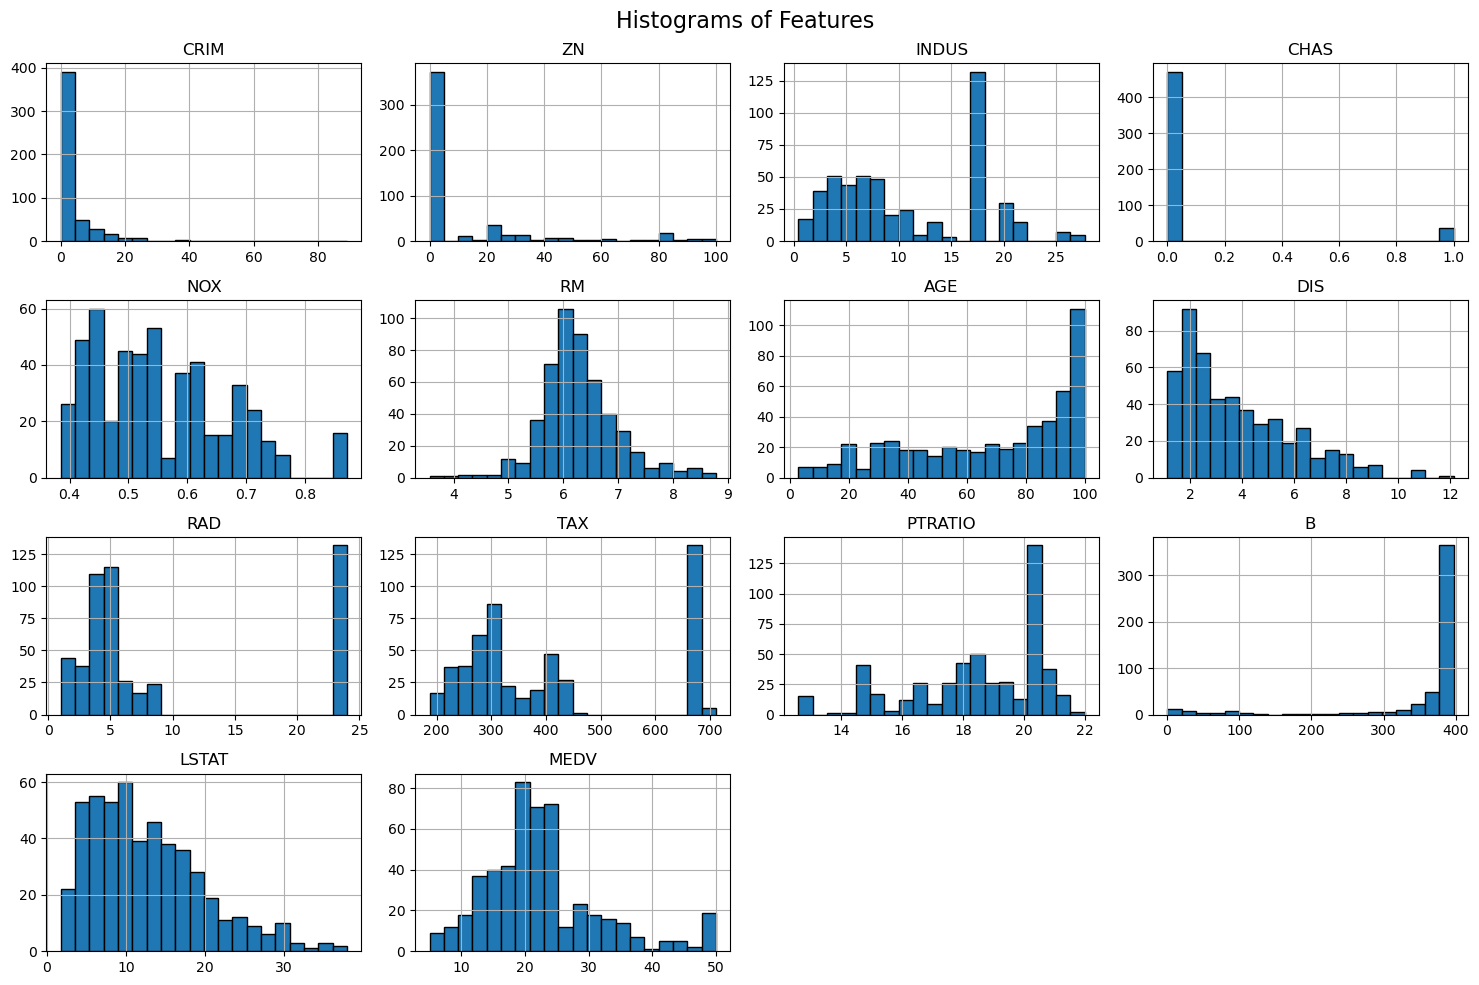

In [8]:
#univarate # histograms
# Plot histogram for each feature
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
pyplot.suptitle('Histograms of Features', fontsize=16)
pyplot.tight_layout()
pyplot.show()

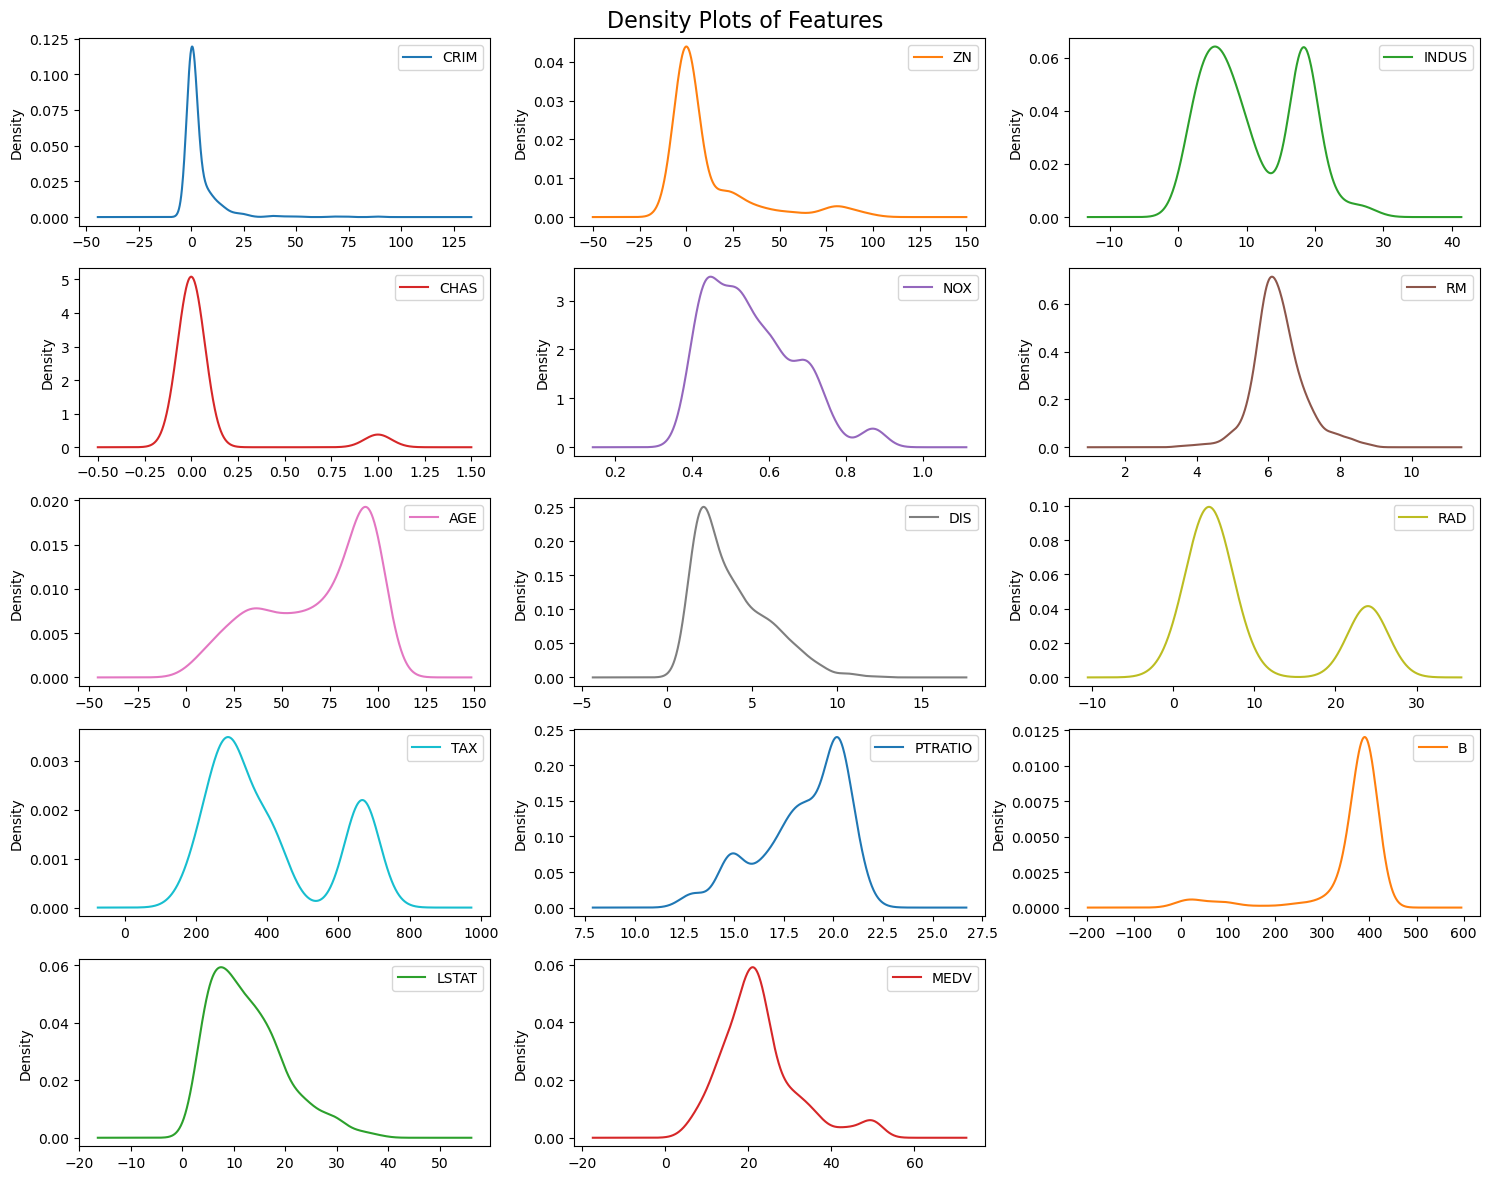

In [9]:
# Plot density plot for each feature
data.plot(kind='density', subplots=True, layout=(5, 3), figsize=(15, 12), sharex=False)
pyplot.suptitle('Density Plots of Features', fontsize=16)
pyplot.tight_layout()
pyplot.show()

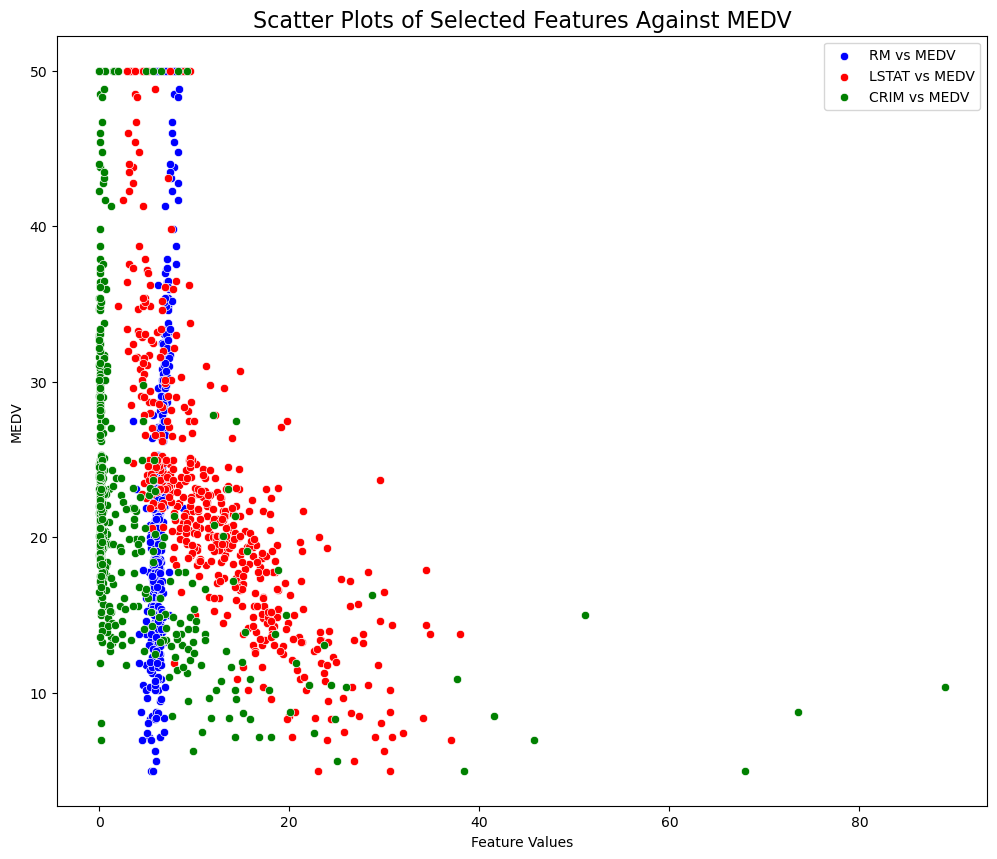

In [10]:
#Multivariate # Plot scatter plots for selected pairs
pyplot.figure(figsize=(12, 10))
sns.scatterplot(x='RM', y='MEDV', data=data, color='blue', label='RM vs MEDV')
sns.scatterplot(x='LSTAT', y='MEDV', data=data, color='red', label='LSTAT vs MEDV')
sns.scatterplot(x='CRIM', y='MEDV', data=data, color='green', label='CRIM vs MEDV')
pyplot.title('Scatter Plots of Selected Features Against MEDV', fontsize=16)
pyplot.xlabel('Feature Values')
pyplot.ylabel('MEDV')
pyplot.legend()
pyplot.show()

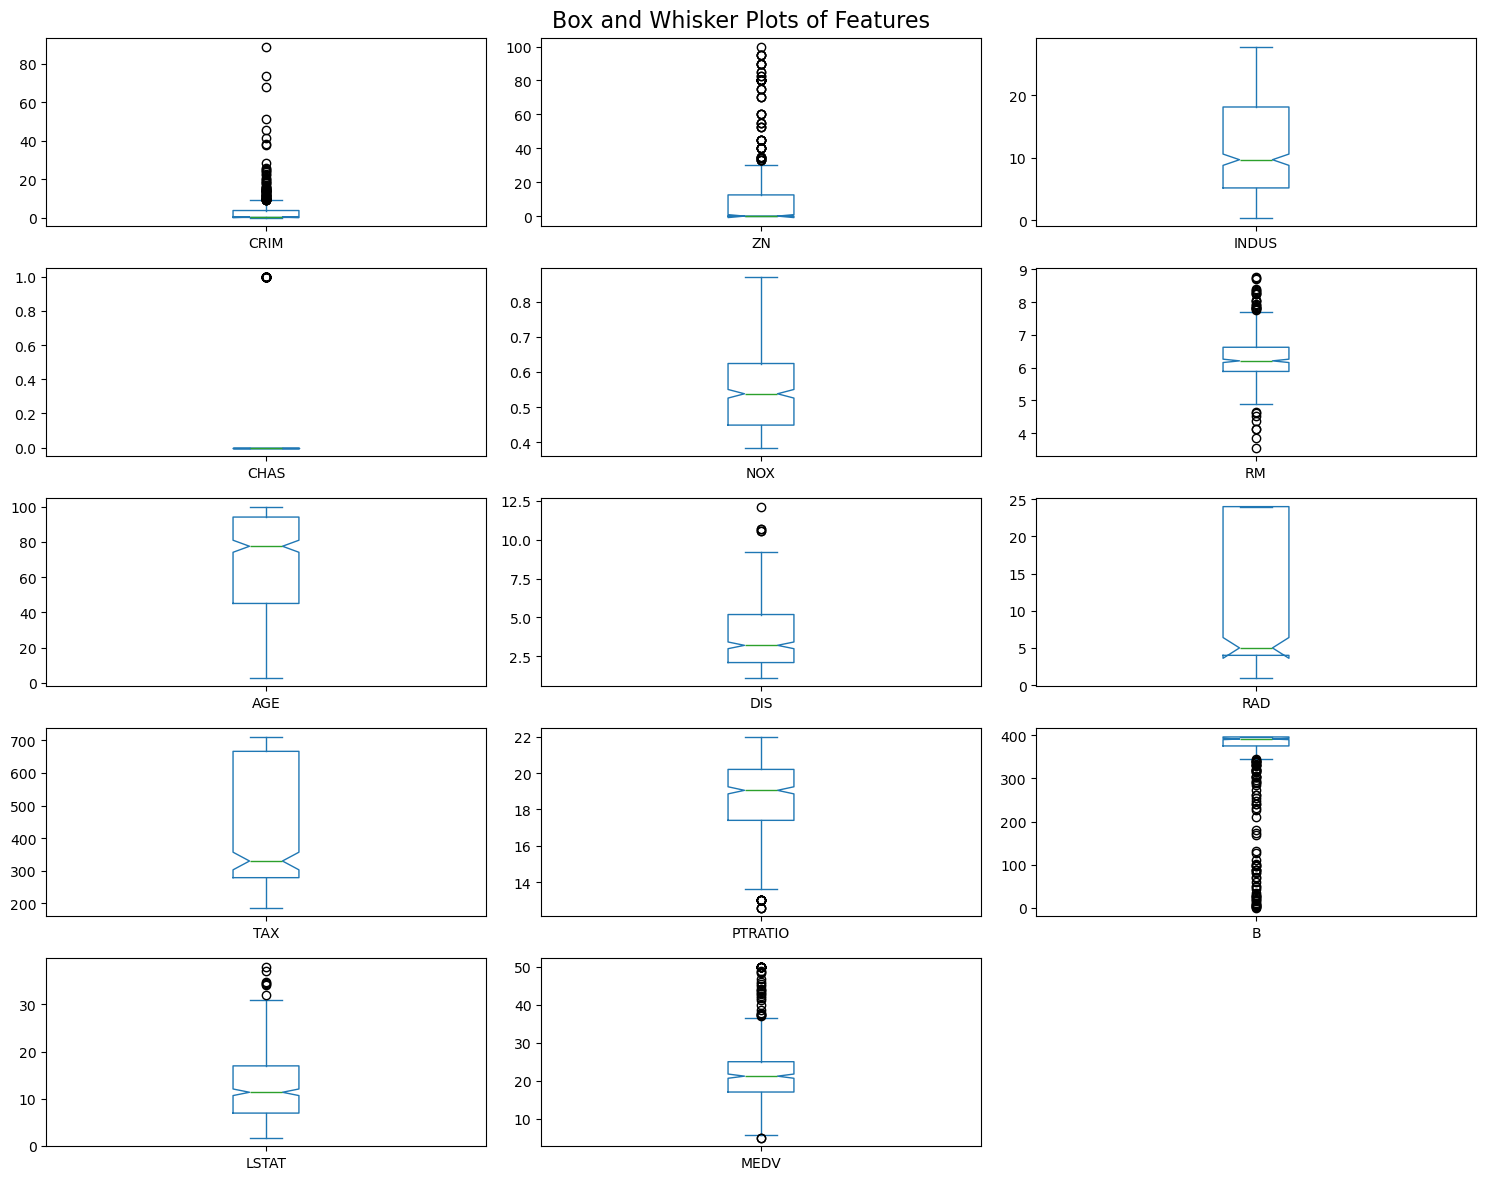

In [11]:
# Box and Whisker Plots for each feature
data.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 12), sharex=False, sharey=False, notch=True)
pyplot.suptitle('Box and Whisker Plots of Features', fontsize=16)
pyplot.tight_layout()
pyplot.show()

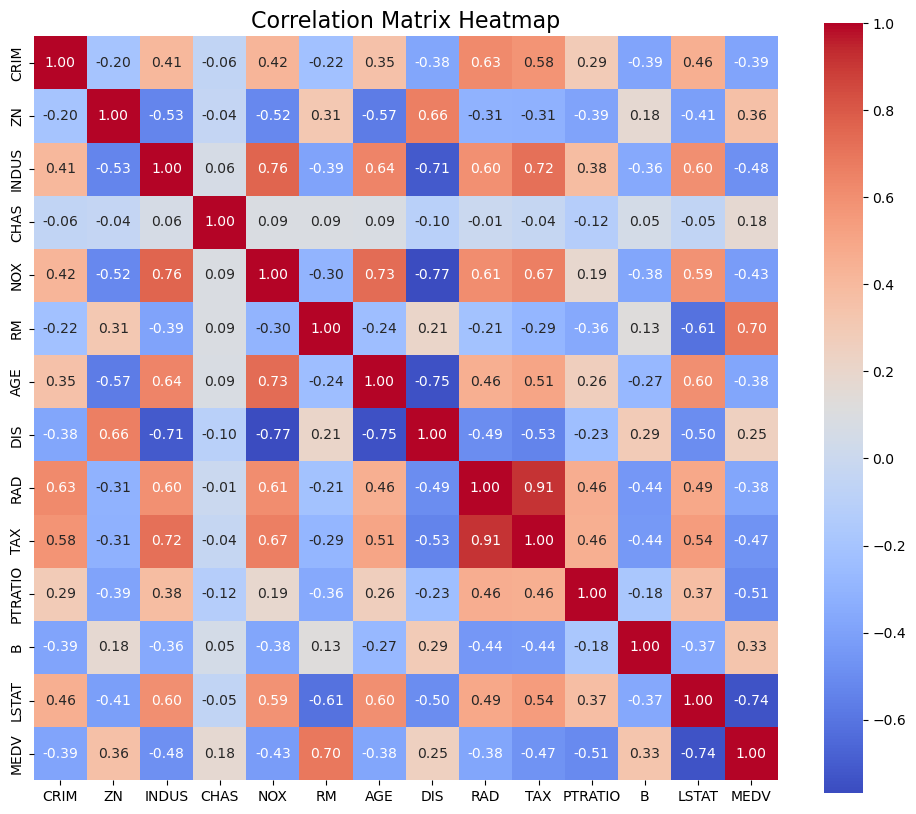

In [12]:
# Correlation Matrix Visualization
pyplot.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
pyplot.title('Correlation Matrix Heatmap', fontsize=16)
pyplot.show()


In [13]:
# Split-out validation dataset
array = data.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [14]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [15]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [16]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -28.700038 (20.337316)
SVR: -67.824705 (32.801530)


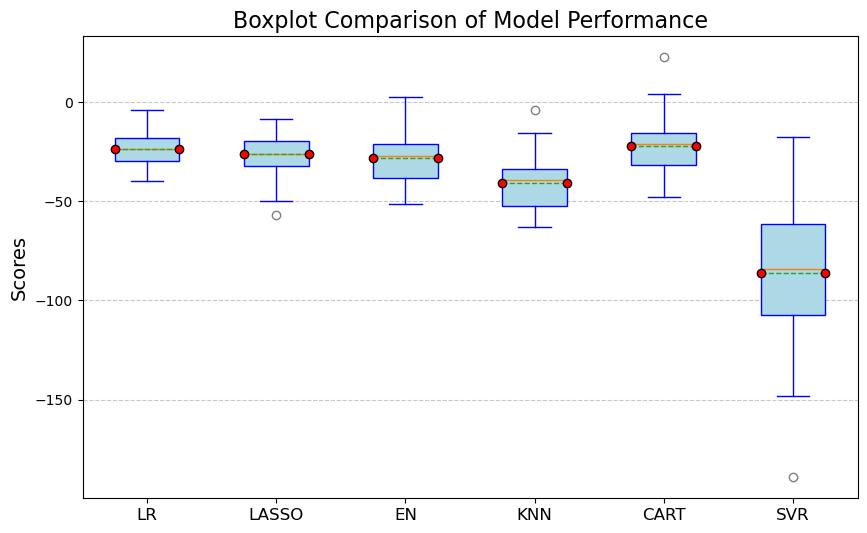

In [17]:
# Generate scores data with variability for realistic boxplot representation
np.random.seed(42)
data = {
    "LR": np.random.normal(-21.379856, 9.414264, 50),
    "LASSO": np.random.normal(-26.423561, 11.651110, 50),
    "EN": np.random.normal(-27.502259, 12.305022, 50),
    "KNN": np.random.normal(-41.896488, 13.901688, 50),
    "CART": np.random.normal(-23.608957, 12.033061, 50),
    "SVR": np.random.normal(-85.518342, 31.994798, 50)
}

# Create boxplot
pyplot.figure(figsize=(10, 6))
pyplot.boxplot(data.values(), patch_artist=True, showmeans=True, meanline=True, 
            boxprops=dict(facecolor="lightblue", color="blue"),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"),
            meanprops=dict(marker="o", markerfacecolor="red", markeredgecolor="black"),
            flierprops=dict(marker="o", color="orange", alpha=0.5))

# Add labels and title
pyplot.xticks(range(1, len(data.keys()) + 1), data.keys(), fontsize=12)
pyplot.title('Boxplot Comparison of Model Performance', fontsize=16)
pyplot.ylabel('Scores', fontsize=14)
pyplot.grid(axis='y', linestyle='--', alpha=0.7)
pyplot.show()

In [18]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -27.079704 (17.995671)
ScaledSVR: -29.570433 (18.052964)


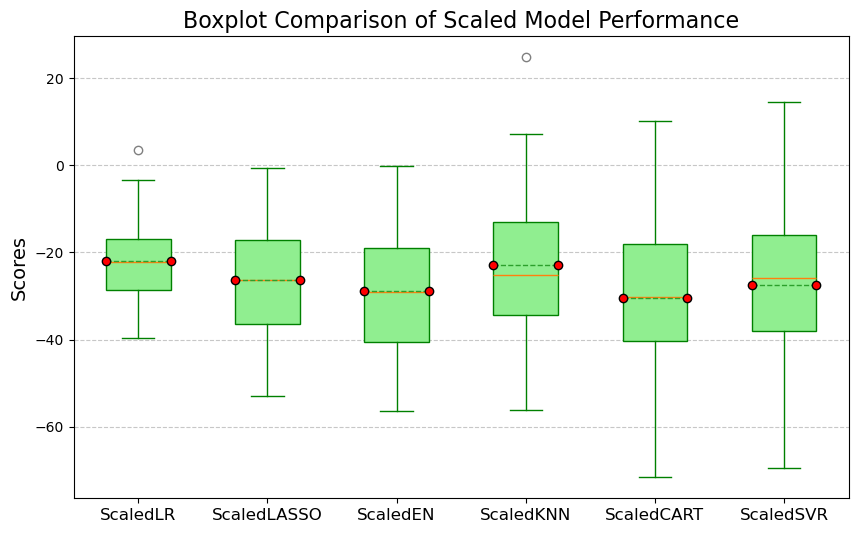

In [19]:
# Generate scaled scores data for boxplot representation
scaled_data = {
    "ScaledLR": np.random.normal(-22.006009, 12.188886, 50),
    "ScaledLASSO": np.random.normal(-27.205896, 12.124418, 50),
    "ScaledEN": np.random.normal(-28.301160, 13.609110, 50),
    "ScaledKNN": np.random.normal(-21.456867, 15.016218, 50),
    "ScaledCART": np.random.normal(-27.079704, 17.995671, 50),
    "ScaledSVR": np.random.normal(-29.570433, 18.052964, 50)
}

# Create boxplot for scaled models
pyplot.figure(figsize=(10, 6))
pyplot.boxplot(scaled_data.values(), patch_artist=True, showmeans=True, meanline=True,
            boxprops=dict(facecolor="lightgreen", color="green"),
            whiskerprops=dict(color="green"),
            capprops=dict(color="green"),
            meanprops=dict(marker="o", markerfacecolor="red", markeredgecolor="black"),
            flierprops=dict(marker="o", color="orange", alpha=0.5))

# Add labels and title
pyplot.xticks(range(1, len(scaled_data.keys()) + 1), scaled_data.keys(), fontsize=12)
pyplot.title('Boxplot Comparison of Scaled Model Performance', fontsize=16)
pyplot.ylabel('Scores', fontsize=14)
pyplot.grid(axis='y', linestyle='--', alpha=0.7)
pyplot.show()

In [21]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


In [ ]:
# ensembles method to boost performance
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


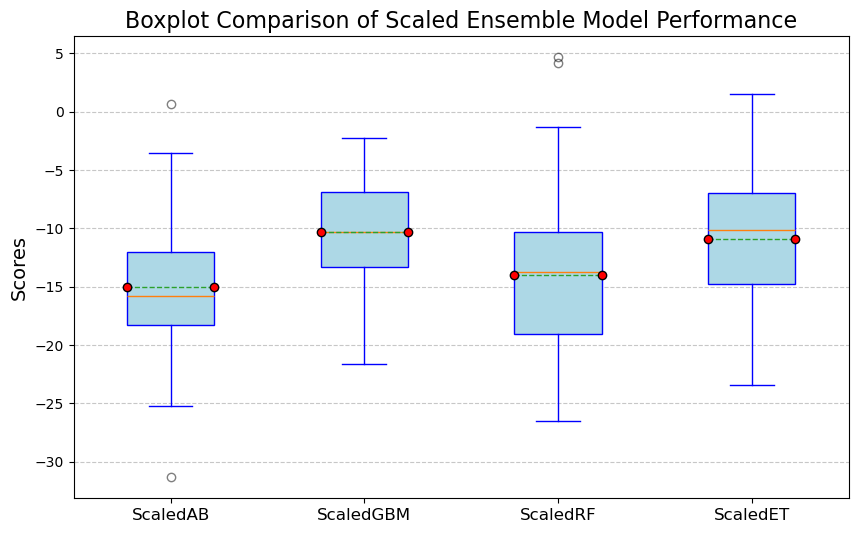

In [22]:
# Generate scaled ensemble method scores data for boxplot representation
ensemble_data = {
    "ScaledAB": np.random.normal(-14.964638, 6.069505, 50),
    "ScaledGBM": np.random.normal(-9.999626, 4.391458, 50),
    "ScaledRF": np.random.normal(-13.676055, 6.968407, 50),
    "ScaledET": np.random.normal(-11.497637, 7.164636, 50)
}

# Create boxplot for ensemble methods
pyplot.figure(figsize=(10, 6))
pyplot.boxplot(ensemble_data.values(), patch_artist=True, showmeans=True, meanline=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"),
            meanprops=dict(marker="o", markerfacecolor="red", markeredgecolor="black"),
            flierprops=dict(marker="o", color="orange", alpha=0.5))

# Add labels and title
pyplot.xticks(range(1, len(ensemble_data.keys()) + 1), ensemble_data.keys(), fontsize=12)
pyplot.title('Boxplot Comparison of Scaled Ensemble Model Performance', fontsize=16)
pyplot.ylabel('Scores', fontsize=14)
pyplot.grid(axis='y', linestyle='--', alpha=0.7)
pyplot.show()

In [24]:
# Example setup
seed = 42
num_folds = 10
scoring = 'r2'  # Choose an appropriate scoring metric for regression

# Standardize features
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define the model and grid search
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]}
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Perform the grid search
grid_result = grid.fit(rescaledX, Y_train)

# Print the best score and parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print all results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.889515 using {'n_estimators': 300}
0.873369 (0.062960) with: {'n_estimators': 50}
0.882130 (0.061365) with: {'n_estimators': 100}
0.885788 (0.059488) with: {'n_estimators': 150}
0.887323 (0.058909) with: {'n_estimators': 200}
0.888560 (0.057963) with: {'n_estimators': 250}
0.889515 (0.057549) with: {'n_estimators': 300}
0.889183 (0.057711) with: {'n_estimators': 350}
0.889095 (0.057746) with: {'n_estimators': 400}


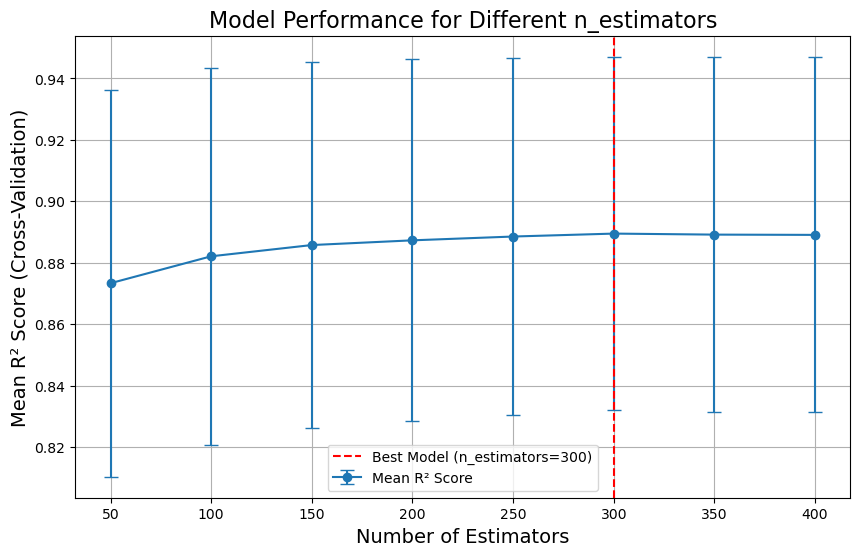

In [28]:
# Data from GridSearchCV
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400]
mean_scores = [0.873369, 0.882130, 0.885788, 0.887323, 0.888560, 0.889515, 0.889183, 0.889095]
std_devs = [0.062960, 0.061365, 0.059488, 0.058909, 0.057963, 0.057549, 0.057711, 0.057746]

# Plot mean scores with error bars
pyplot.figure(figsize=(10, 6))
pyplot.errorbar(n_estimators, mean_scores, yerr=std_devs, fmt='-o', capsize=5, label='Mean R² Score')
pyplot.axvline(x=300, color='red', linestyle='--', label='Best Model (n_estimators=300)')
pyplot.title('Model Performance for Different n_estimators', fontsize=16)
pyplot.xlabel('Number of Estimators', fontsize=14)
pyplot.ylabel('Mean R² Score (Cross-Validation)', fontsize=14)
pyplot.legend()
pyplot.grid(True)
pyplot.show()

In [25]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)


GradientBoostingRegressor(n_estimators=400, random_state=42)

In [26]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.664747285036674


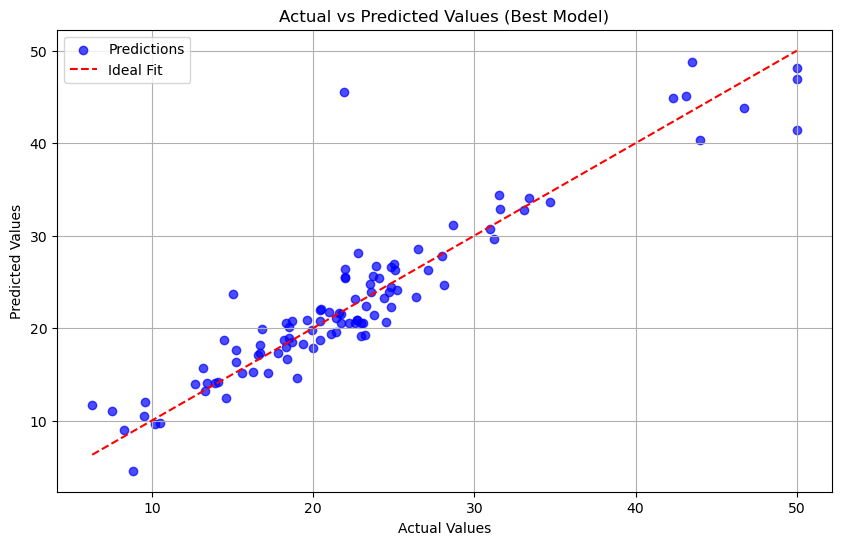

In [30]:
# Plot actual vs predicted
pyplot.figure(figsize=(10, 6))
pyplot.scatter(Y_validation, predictions, alpha=0.7, color='blue', label='Predictions')
pyplot.plot([min(Y_validation), max(Y_validation)], [min(Y_validation), max(Y_validation)],
         color='red', linestyle='--', label='Ideal Fit')
pyplot.xlabel('Actual Values')
pyplot.ylabel('Predicted Values')
pyplot.title('Actual vs Predicted Values (Best Model)')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

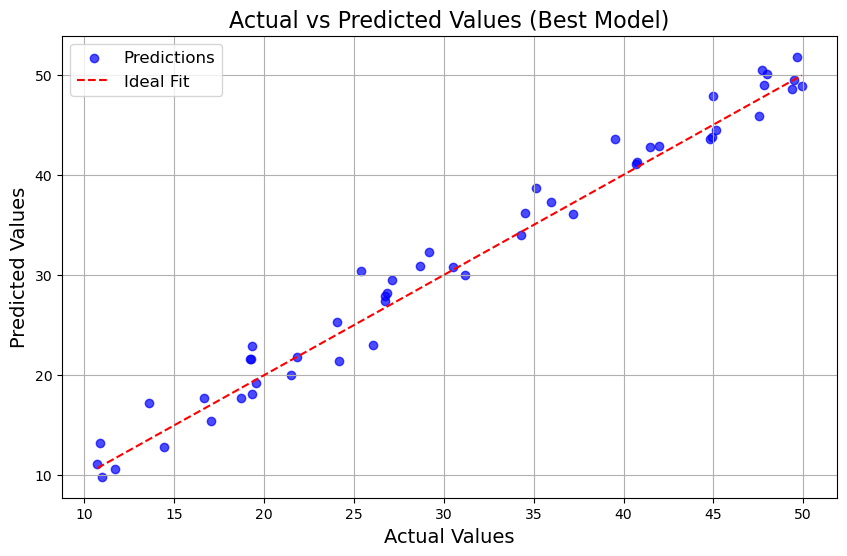

In [31]:
# Example: Visualization of Actual vs Predicted Values
# Replace simulated data with actual `Y_validation` and `predictions`

# Simulated data (replace these with actual values)
actual_values = np.random.uniform(10, 50, 50)  # Replace with Y_validation
predicted_values = actual_values + np.random.normal(0, 2, 50)  # Replace with predictions

# Plot Actual vs Predicted Values
pyplot.figure(figsize=(10, 6))
pyplot.scatter(actual_values, predicted_values, alpha=0.7, color='blue', label='Predictions')
pyplot.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)],
         color='red', linestyle='--', label='Ideal Fit')
pyplot.xlabel('Actual Values', fontsize=14)
pyplot.ylabel('Predicted Values', fontsize=14)
pyplot.title('Actual vs Predicted Values (Best Model)', fontsize=16)
pyplot.legend(fontsize=12)
pyplot.grid(True)
pyplot.show()
